# Bandit Problem

In [373]:
# imports
from bandits import Bandit
import numpy as np
import matplotlib.pyplot as plt
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [374]:
bandits = [Bandit(np.random.random()*4-2) for _ in range(10)]


In [375]:
bandits[0].pullLever()


-0.11306553283726238

## Greedy algorithm Implementation

In [376]:
def run_greedy(rewards):
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    Q_estimate = np.zeros(10)
    n_arms = np.zeros(10)
    for step in range(1000): #in each iteration, 1000 choices were made(i.e; 1000 time-steps were taken)
        action = np.argmax(Q_estimate) #greedy selection
        r = bandits[action].pullLever()
        rewards[step] += r
        n_arms[action] += 1
        Q_estimate[action] += (r - Q_estimate[action])/n_arms[action]
    return

Plot the cumulative average of rewards as the number of iterations increases.

In [377]:
rewards = np.zeros(1000)
for run in range(2000): #2000 iterations!
    run_greedy(rewards)
avg_rewards = rewards/2000    

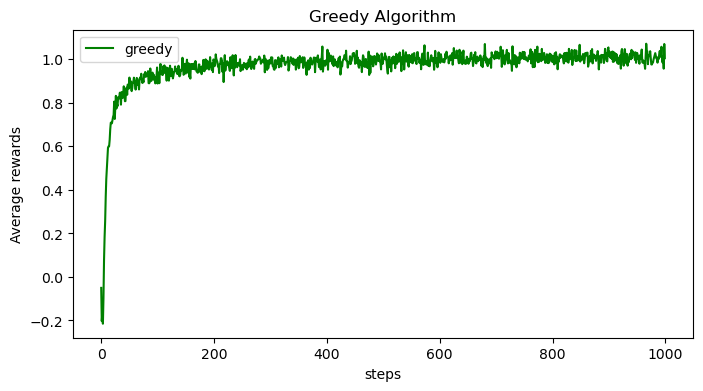

In [378]:
plt.figure(figsize = (8,4))
plt.plot(avg_rewards, label = "greedy",color = 'green')
plt.xlabel("steps")
plt.ylabel("Average rewards")
plt.title('Greedy Algorithm')
plt.legend()
plt.show()

## $\epsilon$-greedy Algorithm

In [379]:
def run_epsilon_greedy(epsilon,i):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    rewards = np.zeros(1000)
    for run in range(i):
        Q = np.zeros(10)
        n_arms = np.zeros(10)
        for step in range(1000):
            if np.random.rand() < epsilon: #exploring with probability epsilon
                action = random.choice(range(10))
            else:
                action = np.argmax(Q) #exploiting with probability 1-epsilon
            r = bandits[action].pullLever()
            rewards[step] += r
            n_arms[action] += 1
            Q[action] += (r - Q[action])/n_arms[action]
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

In [380]:
avg_rewards1 = run_epsilon_greedy(0.1,2000)/2000
avg_rewards2 = run_epsilon_greedy(0.01,2000)/2000

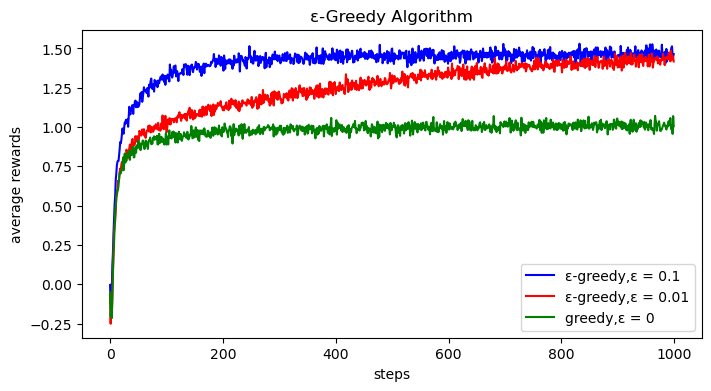

In [381]:
plt.figure(figsize = (8,4))
plt.plot(avg_rewards1,label = 'ε-greedy,ε = 0.1',color = 'blue')
plt.plot(avg_rewards2,label = 'ε-greedy,ε = 0.01',color = 'red')
plt.plot(avg_rewards, label = "greedy,ε = 0",color = 'green')
plt.xlabel('steps')
plt.ylabel('average rewards')
plt.title('ε-Greedy Algorithm')
plt.legend()
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

In [382]:
list_avg_rewards = []
epsilon_values = [1,0.80,0.75,0.65,0.50,0.40,0.30,0.10,0.05,0.01]
for item in epsilon_values:
    list_avg_rewards.append(run_epsilon_greedy(item,1000)/1000)


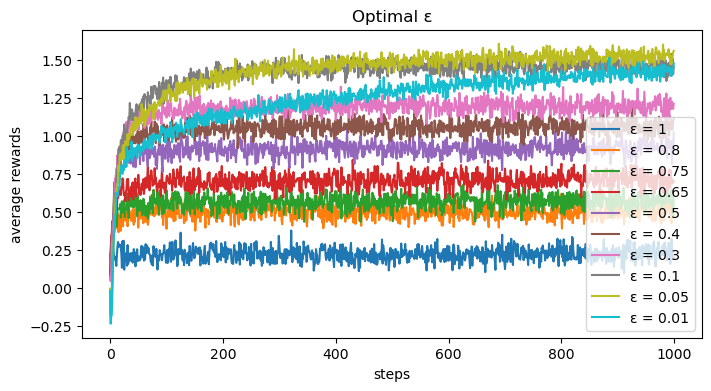

In [383]:
plt.figure(figsize = (8,4))
for i in range(10):
    plt.plot(list_avg_rewards[i] ,label = f'ε = {epsilon_values[i]}')
plt.xlabel('steps')
plt.ylabel('average rewards')
plt.title('Optimal ε')
plt.legend()
plt.show()

In [384]:
#from the above plot, it is clear that the optimal epsilon value is "0.05" !

## Optimistic Initial Values

In [385]:
def run_optimistic_greedy(Q1):
    # TODO: Implement the optimistic greedy algorithm here
    # Return the reward from the bandits in a list
    rewards = np.zeros(1000)
    for run in range(2000):
        Q = np.array([Q1]*10)
        N = np.zeros(10)
        for step in range(1000):
            action = np.argmax(Q)
            r = bandits[action].pullLever()
            rewards[step] += r
            N[action] += 1
            Q[action] += (r - Q[action])/N[action]
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

In [386]:
avg_Rewards1 = run_optimistic_greedy(10)/2000


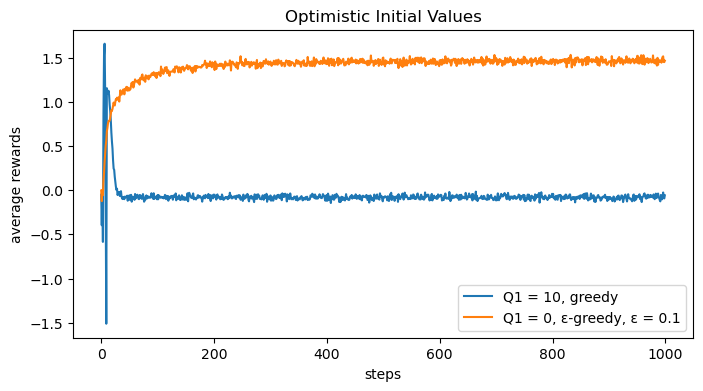

In [387]:
plt.figure(figsize = (8,4))
plt.plot(avg_Rewards1, label = 'Q1 = 10, greedy')
plt.plot(avg_rewards1, label = 'Q1 = 0, ε-greedy, ε = 0.1')
plt.xlabel('steps')
plt.ylabel('average rewards')
plt.title('Optimistic Initial Values')
plt.legend()
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [389]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    rewards = np.zeros(1000)
    for run in range(2000):
        Q = np.zeros(10)
        N = np.zeros(10)
        for step in range(1000):
            ucb = Q + c*np.sqrt(np.log(step+1)/(N + 1e-5))
            if step < 10:
                action = step
            else:
                action = np.argmax(ucb)
            r = bandits[action].pullLever()
            rewards[step] += r
            N[action] += 1
            Q[action] += (r - Q[action])/N[action]
    return rewards

In [390]:
Avg_Rewards = run_ucb(2)/2000

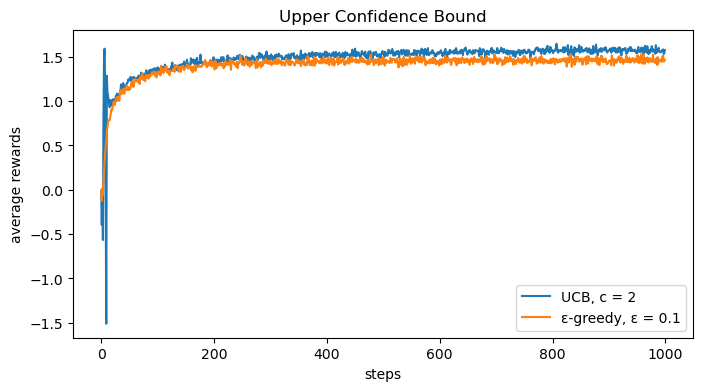

In [391]:
plt.figure(figsize = (8,4))
plt.plot(Avg_Rewards, label = 'UCB, c = 2')
plt.plot(avg_rewards1, label = 'ε-greedy, ε = 0.1')
plt.xlabel('steps')
plt.ylabel('average rewards')
plt.title('Upper Confidence Bound')
plt.legend()
plt.show()